**A/B Testing in Python**

**Aim :** In this session, we aim to reveal whether there is a **significant difference** in the **performance variables** provided for two SEO (Search Engine Optimization)/Digital Marketing Campaign.

**Dataset :** Dataset contains 4 different metric variables observed during one month: Purchase, Impression, Earning, Click

Concepts & Steps in A/B Testing:

In this notebook, the necesarry statistical steps of A/B Testing and interpretation of the results of the hypothesis tests that are used in A/B Testing process will be shown:

A/B Testing method covers the statistical hypothesis tests that are used to reveal significance of the difference in a metric variable values between two groups such a Group A and Group B.

There are two statistical Test to test the significance as **Independent Samples t Test (Parametric)** and **Mann-Whitney U Test (Non-parametric)**.

1. Step: Testing the Normality Assumption, it is decided between two alternative methods.

*** A/B Testing Steps ***

**Step 1: Testing the Normality Assumption**

It is necesarry to decide which way of testing the significance of difference will be choosen. Shaphiro Wilks test is a way to test if the series has normal distribution or not. Also, a Box Plot might be helpfull to observe if the series has outliers or not. According to result of the test it can be decided between Independent Samples t Test and Mann-Whitney U Test.

If p value of the test is greater than 0.05 i.e. in case of normality assumption hold, A/B Testing method will be Independent Samples t Test.

In addition, Independent Samples t Test requires another assumption which is Homogeneity, so if the result is normal then you can follow **Step 2: Testing the Homogeneity Assumption.**

If p value of the test is less than 0.05 then A/B Testing method will be Mann-Whitney U Test; the non-parametric equivalent of parametric t-test.

In addition, Mann-Whitney U Test does not require any other assumptions, so if the result is not normal then you can jump to **Step 3: Alternative 2 -> Mann-Whitney U Test.**

**Step 2: Testing the Homogeneity Assumption**

This assumption is only relevant in the case of normal distribution. It is necesarry to decide which code setting will be choosen while executing the ** Step 3: Alternative 1 -> Independent Samples t Test.**

If p value of the test is greater than 0.05 then Independent Samples t Test will be done with "equal_var=True" extention.

If p value of the test is less than 0.05 then Independent Samples t Test will be done with "equal_var=False" extention.

**Step 3: Alternative 1 -> Independent Samples t Test**

It can be defined as an approach that tests to statistically reveal whether there is a significant difference between the means of two groups of data.

**Step 3: Alternative 2 -> Mann-Whitney U Test**

It can be defined as an approach that tests to statistically reveal whether there is a significant difference between the distributions of two groups of data.

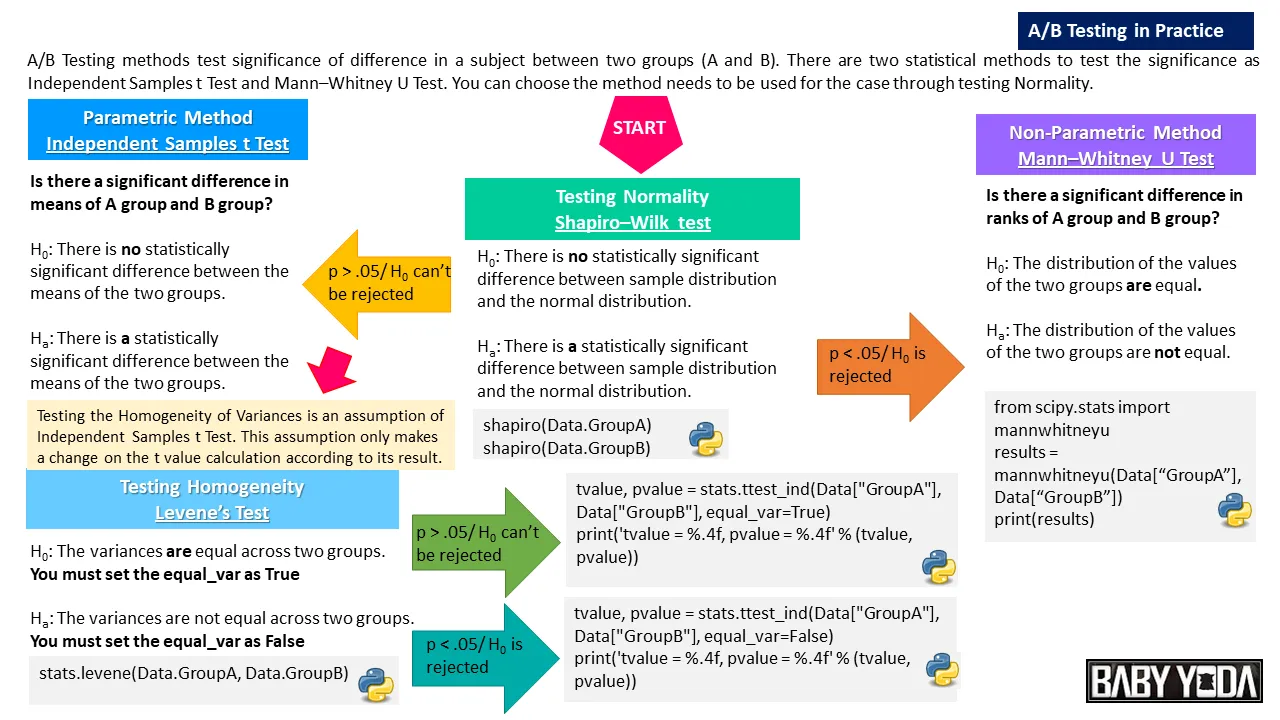

In [20]:
# Importing the required Libraries
import statistics
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns

from termcolor import colored

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [21]:
# Connecting Google Drive with colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Read data from the Two excel sheet
DataGroupA = pd.read_excel("/content/drive/MyDrive/Data_Analyst/Python_Projects/AB_Testing/ab_testing_data.xlsx" , sheet_name= "Control Group")
DataGroupB = pd.read_excel("/content/drive/MyDrive/Data_Analyst/Python_Projects/AB_Testing/ab_testing_data.xlsx" , sheet_name= "Control Group")


In [23]:
DataGroupA.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [24]:
DataGroupA.shape

(40, 4)

In [25]:
DataGroupA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [26]:
DataGroupA.describe().round()

,Impression,Click,Purchase,Earning
count,40.0,40.0,40.0,40.0
mean,101711.0,5101.0,551.0,1909.0
std,20302.0,1330.0,134.0,303.0
min,45476.0,2190.0,267.0,1254.0
25%,85727.0,4124.0,470.0,1686.0
50%,99791.0,5001.0,531.0,1975.0
75%,115213.0,5924.0,638.0,2120.0
max,147539.0,7959.0,802.0,2497.0


In [27]:
DataGroupB.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [28]:
print("Row * Column:", DataGroupB.shape)
DataGroupB.info()
print("Summary Statistics of the Test Group:", DataGroupB.describe())

Row * Column: (40, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB
Summary Statistics of the Test Group:           Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   101711.449068  5100.657373  550.894059  1908.568300
std     20302.157862  1329.985498  134.108201   302.917783
min     45475.942965  2189.753157  267.028943  1253.989525
25%     85726.690349  4124.304129  470.095533  1685.847205
50%     99790.701078  5001.220602  531.206307  1975.160522
75%    115212.816543  5923.803596  637.957088  2119.802784
max    147539.336329  7959.125069  801.795020  2497.295218


In [29]:
#Feature Engineering: Conversion Rate
DataGroupA["Conversion Rate"] = DataGroupA["Purchase"]/DataGroupA["Click"]*100
print(DataGroupA.head())
DataGroupB["Conversion Rate"] = DataGroupB["Purchase"]/DataGroupB["Click"]*100
print(DataGroupB.head())

      Impression        Click    Purchase      Earning  Conversion Rate
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721
      Impression        Click    Purchase      Earning  Conversion Rate
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721


In [30]:
#Feature Engineering: Earning per Purchase
DataGroupA["Earning per Purchase"] = DataGroupA["Earning"]/DataGroupA["Purchase"]
print(DataGroupA.head())
DataGroupB["Earning per Purchase"] = DataGroupB["Earning"]/DataGroupB["Purchase"]
print(DataGroupB.head())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721   

   Earning per Purchase  
0              3.474501  
1              5.531229  
2              3.924670  
3              3.482368  
4              3.500229  
      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4  108457.762630  

In [31]:
#Data Manipulation: Indication of Groups in A New Variable
DataGroupA["Group"] = "GroupA"
print(DataGroupA.head())
DataGroupB["Group"] = "GroupB"
print(DataGroupB.head())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721   

   Earning per Purchase   Group  
0              3.474501  GroupA  
1              5.531229  GroupA  
2              3.924670  GroupA  
3              3.482368  GroupA  
4              3.500229  GroupA  
      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  16

In [32]:
#Combining the Datasets
Data = pd.concat([DataGroupA, DataGroupB], ignore_index=True)
print(Data.head())
print(Data.tail())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721   

   Earning per Purchase   Group  
0              3.474501  GroupA  
1              5.531229  GroupA  
2              3.924670  GroupA  
3              3.482368  GroupA  
4              3.500229  GroupA  
       Impression        Click    Purchase      Earning  Conversion Rate  \
75  132064.219003  3747.157544  551.072406  2256.975589        14.706411   
76   86409.941796  4608.256205  345.046033  1781.357690         7.487562   
77  123678.934234  3649.073787  476.168128  2187.721217        13.049013   
78  101997.494099  4736.353369  474.61353

In [33]:
print(Data)

       Impression        Click    Purchase      Earning  Conversion Rate  \
0    82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1    98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2    82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3   109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4   108457.762630  5987.655811  441.034050  1543.720179         7.365721   
..            ...          ...         ...          ...              ...   
75  132064.219003  3747.157544  551.072406  2256.975589        14.706411   
76   86409.941796  4608.256205  345.046033  1781.357690         7.487562   
77  123678.934234  3649.073787  476.168128  2187.721217        13.049013   
78  101997.494099  4736.353369  474.613537  2254.563834        10.020653   
79  121085.881220  4285.178608  590.406020  1289.308948        13.777863   

    Earning per Purchase   Group  
0               3.474501  GroupA  
1               5

 A/B Testing for Impression  

Summary Statistics by Groups for Impression 

Impression
Group          GroupA         GroupB
count       40.000000      40.000000
mean    101711.449068  101711.449068
std      20302.157862   20302.157862
median   99790.701078   99790.701078
min      45475.942965   45475.942965
max     147539.336329  147539.336329 

Histogram by Groups for Impression 



/tmp/ipython-input-885319297.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA[x] , color="skyblue", label="GroupA")
/tmp/ipython-input-885319297.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupB[x] , color="red", label="GroupB")


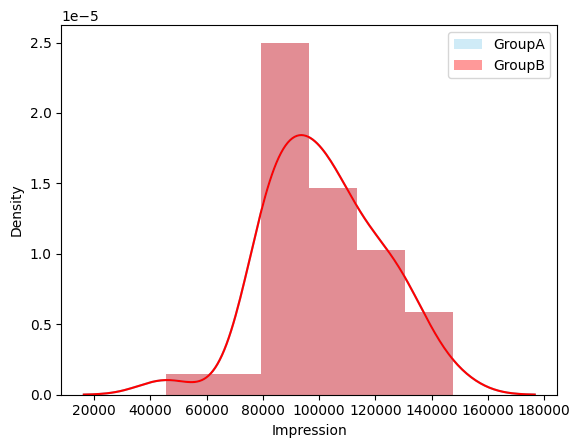

Box Plot by Groups for Impression 



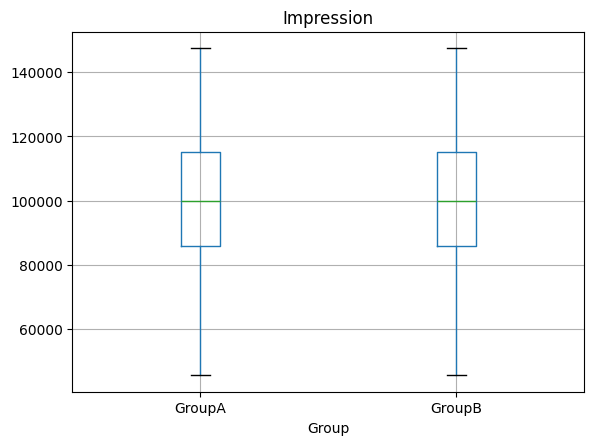

Step 1: Testing the Normality Assumption for Impression 

GroupA_shaphiro_p = 0.351, GroupB_shaphiro_p = 0.351 

Shaphiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. Accordingly distribution of Impression values in GroupA and GroupB are likely to normally distribution. 

Step 2: Testing the Homogeneity Assumption for Impression 

levene_F = 0.000, levene_p = 1.000 

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of GroupA and GroupB are equal. 

3. Step: Alternative 1 -> Independent Samples t Test for Impression 

t_value = 0.000, t_test_p = 1.000 

Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in Impression values. 

 A/B Testing for Click  

Summary Statistics by Groups for Click 

Click
Group        GroupA       GroupB
count     40.000000    40

/tmp/ipython-input-885319297.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA[x] , color="skyblue", label="GroupA")
/tmp/ipython-input-885319297.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupB[x] , color="red", label="GroupB")


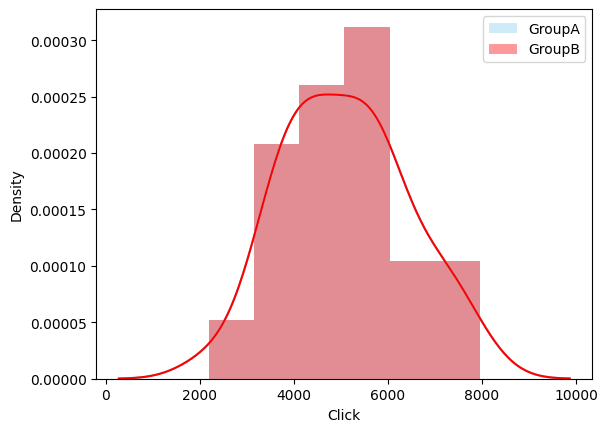

Box Plot by Groups for Click 



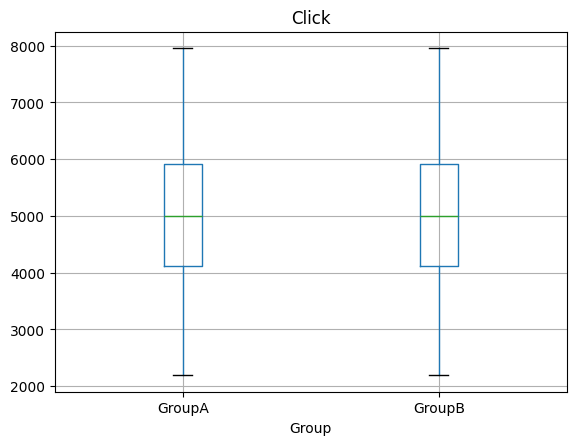

Step 1: Testing the Normality Assumption for Click 

GroupA_shaphiro_p = 0.846, GroupB_shaphiro_p = 0.846 

Shaphiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. Accordingly distribution of Click values in GroupA and GroupB are likely to normally distribution. 

Step 2: Testing the Homogeneity Assumption for Click 

levene_F = 0.000, levene_p = 1.000 

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of GroupA and GroupB are equal. 

3. Step: Alternative 1 -> Independent Samples t Test for Click 

t_value = 0.000, t_test_p = 1.000 

Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in Click values. 

 A/B Testing for Purchase  

Summary Statistics by Groups for Purchase 

Purchase
Group       GroupA      GroupB
count    40.000000   40.000000
mean    550.

/tmp/ipython-input-885319297.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA[x] , color="skyblue", label="GroupA")
/tmp/ipython-input-885319297.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupB[x] , color="red", label="GroupB")


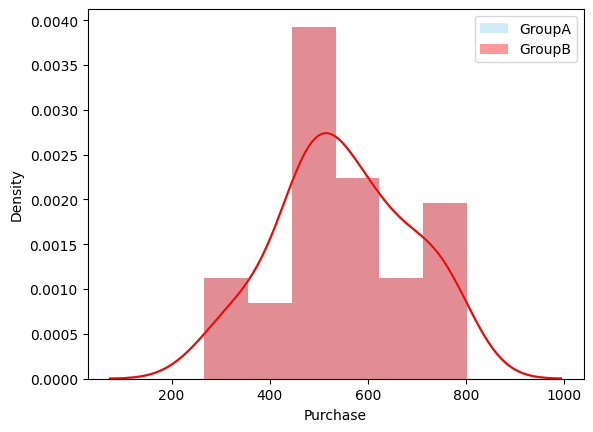

Box Plot by Groups for Purchase 



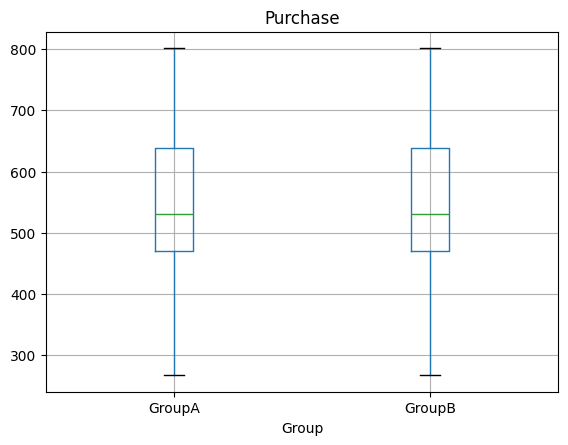

Step 1: Testing the Normality Assumption for Purchase 

GroupA_shaphiro_p = 0.589, GroupB_shaphiro_p = 0.589 

Shaphiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. Accordingly distribution of Purchase values in GroupA and GroupB are likely to normally distribution. 

Step 2: Testing the Homogeneity Assumption for Purchase 

levene_F = 0.000, levene_p = 1.000 

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of GroupA and GroupB are equal. 

3. Step: Alternative 1 -> Independent Samples t Test for Purchase 

t_value = 0.000, t_test_p = 1.000 

Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in Purchase values. 

 A/B Testing for Earning  

Summary Statistics by Groups for Earning 

Earning
Group        GroupA       GroupB
count     40.000000    40.000

/tmp/ipython-input-885319297.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA[x] , color="skyblue", label="GroupA")
/tmp/ipython-input-885319297.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupB[x] , color="red", label="GroupB")


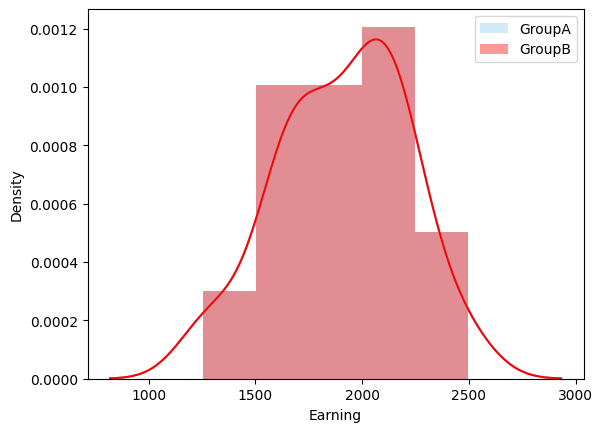

Box Plot by Groups for Earning 



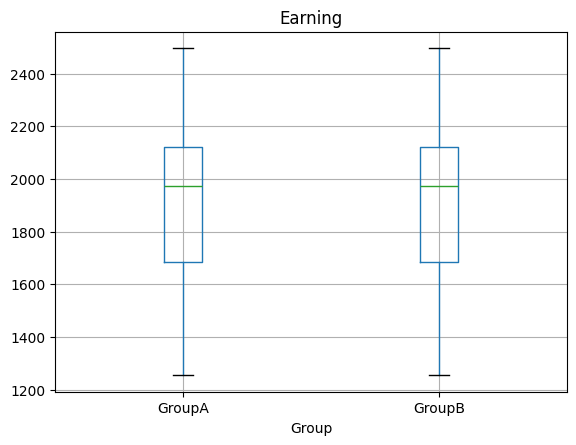

Step 1: Testing the Normality Assumption for Earning 

GroupA_shaphiro_p = 0.531, GroupB_shaphiro_p = 0.531 

Shaphiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. Accordingly distribution of Earning values in GroupA and GroupB are likely to normally distribution. 

Step 2: Testing the Homogeneity Assumption for Earning 

levene_F = 0.000, levene_p = 1.000 

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of GroupA and GroupB are equal. 

3. Step: Alternative 1 -> Independent Samples t Test for Earning 

t_value = 0.000, t_test_p = 1.000 

Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in Earning values. 

 A/B Testing for Conversion Rate  

Summary Statistics by Groups for Conversion Rate 

Conversion Rate
Group      GroupA     GroupB
count   40.000

/tmp/ipython-input-885319297.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA[x] , color="skyblue", label="GroupA")
/tmp/ipython-input-885319297.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupB[x] , color="red", label="GroupB")


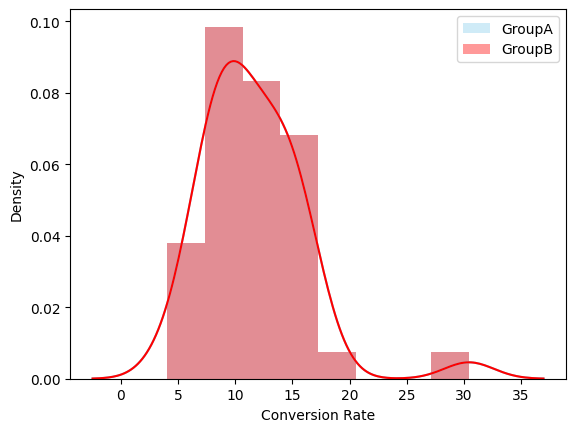

Box Plot by Groups for Conversion Rate 



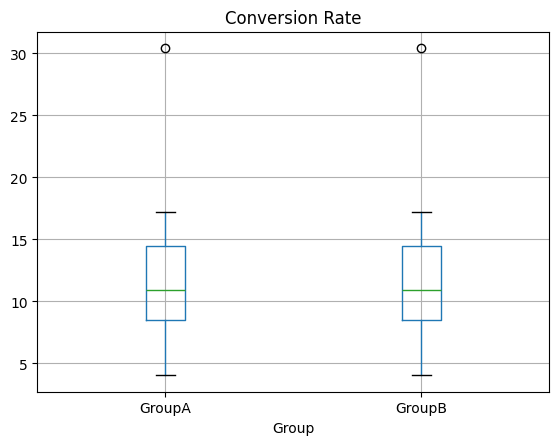

Step 1: Testing the Normality Assumption for Conversion Rate 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of Conversion Rate values in GroupA and GroupB are not likely to normally distribution. 

Step 3: Alternative 2 -> Mann-Whitney U Test for Conversion Rate 

u_value=800.000, mannw_test_p=1.000 

Mann Whitney U Test resulted as p > 0.05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of Conversion Rate values. 

 A/B Testing for Earning per Purchase  

Summary Statistics by Groups for Earning per Purchase 

Earning per Purchase
Group      GroupA     GroupB
count   40.000000  40.000000
mean     3.688075   3.688075
std      1.137500   1.137500
median   3.491217   3.491217
min      1.826339   1.826339
max      6.710130   6.710130 

Histogram by Groups for Earning per 

/tmp/ipython-input-885319297.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA[x] , color="skyblue", label="GroupA")
/tmp/ipython-input-885319297.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupB[x] , color="red", label="GroupB")


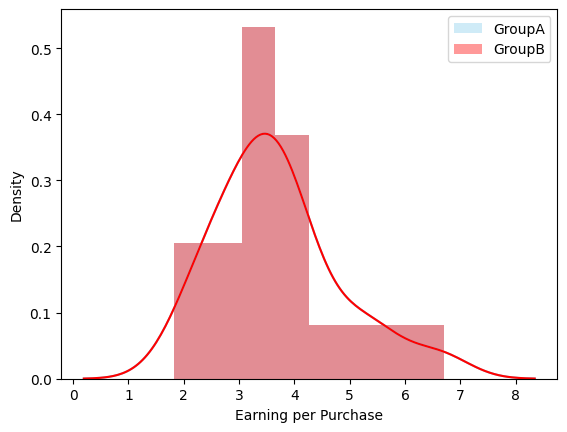

Box Plot by Groups for Earning per Purchase 



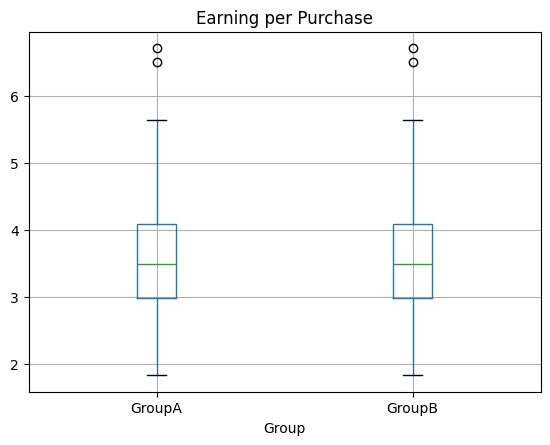

Step 1: Testing the Normality Assumption for Earning per Purchase 

GroupA_shaphiro_p = 0.029, GroupB_shaphiro_p = 0.029 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of Earning per Purchase values in GroupA and GroupB are not likely to normally distribution. 

Step 3: Alternative 2 -> Mann-Whitney U Test for Earning per Purchase 

u_value=800.000, mannw_test_p=1.000 

Mann Whitney U Test resulted as p > 0.05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of Earning per Purchase values. 



In [34]:
variables = ["Impression","Click","Purchase","Earning","Conversion Rate","Earning per Purchase"]

for x in variables:
    print(colored(" A/B Testing for ","cyan", attrs=["bold",'reverse', 'blink'])+colored(x+" ","cyan", attrs=["bold",'reverse', 'blink']),"\n")
    print(colored("Summary Statistics by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    result3 = Data.groupby("Group")[x].aggregate(["count","mean","std","median","min","max"])
    result4 = result3.transpose()
    print(x)
    print(result4,"\n")
    print(colored("Histogram by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    #sns.displot(Data, x=x, hue="Group", element="step", kde=True)
    #plt.show()
    sns.distplot( DataGroupA[x] , color="skyblue", label="GroupA")
    sns.distplot( DataGroupB[x] , color="red", label="GroupB")
    plt.legend()
    plt.show()

    def normald():

        Data.boxplot(column=[x], by="Group",return_type=None)
        plt.suptitle("")
        print(colored("Box Plot by Groups for "+x,"cyan", attrs=["bold"]),"\n")
        plt.show()

        print(colored("Step 1: Testing the Normality Assumption for "+x,"cyan", attrs=["bold"]),"\n")
        GroupA_shaphiro_w, GroupA_shaphiro_p = shapiro(DataGroupA[x])
        GroupB_shaphiro_w, GroupB_shaphiro_p = shapiro(DataGroupB[x])
        print("GroupA_shaphiro_p = %.3f, GroupB_shaphiro_p = %.3f" % (GroupA_shaphiro_p, GroupB_shaphiro_p),"\n")

        if GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p > 0.05:
            print("Shaphiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. "
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are likely to normally distribution.","\n")
            return 1
        elif GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p < 0.05:
            print("Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. "
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are not likely to normally distribution.","\n")
            return 2
        elif GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p < 0.05:
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. "
                  "Accordingly you can check if the "+x+" values in"+" GroupB contain outlier or not","\n")
            return 3
        else :
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > 0.05 for GroupB while p < 0.05 for GroupA which indicates that H0 is rejected for GroupA. "
                "Accordingly you can check if the "+x+" values in"+" GroupA contain outlier or not","\n")
            return 4

    result = normald()
    if result == 1:

            print(colored("Step 2: Testing the Homogeneity Assumption for "+x,"cyan", attrs=["bold"]),"\n")
            levene_F, levene_p = stats.levene(DataGroupA[x], DataGroupB[x])
            print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")
            if levene_p > 0.05:
                print("Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly variances of GroupA and GroupB are equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(DataGroupA[x], DataGroupB[x], equal_var=True)
                print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else:
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values at 5% level of significance.","\n")
                    if statistics.mean(DataGroupA["Earning"]) > statistics.mean(DataGroupB["Earning"]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
            else :
                print("Levene's Test for Homogeneity resulted as p < 0.05 which indicates that H0 is rejected."
                      " Accordingly variances of GroupA and GroupB are not equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(DataGroupA[x], DataGroupB[x], equal_var=False)
                print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > 0.05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else:
                    print("Independent Samples t Test resulted as p < 0.05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(DataGroupA[x]) > statistics.mean(DataGroupB[x]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")


    elif result == 2 or result == 3 or result == 4:

            print(colored("Step 3: Alternative 2 -> Mann-Whitney U Test for "+x,"cyan", attrs=["bold"]),"\n")
            u_value, mannw_test_p = mannwhitneyu(DataGroupA[x], DataGroupB[x])
            print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p),"\n")
            if mannw_test_p > 0.05:
                print("Mann Whitney U Test resulted as p > 0.05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
            else:
                print("Mann Whitney U Test resulted as p < 0.05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
                if statistics.median(DataGroupA["Earning"]) > statistics.median(DataGroupB["Earning"]):
                    print("Median of GroupA in "+x+" is greater than GroupB","\n")
                else:
                    print("Median of GroupB in "+x+" is greater than GroupA","\n")
    else :
            print("Something is wrong. Check your data!")

**A/B Testing for Convertion Rate:**

/tmp/ipython-input-1672364882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA["Conversion Rate"] , color="skyblue", label="GroupA")
/tmp/ipython-input-1672364882.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupB["Conversion Rate"] , color="red", label="GroupB")


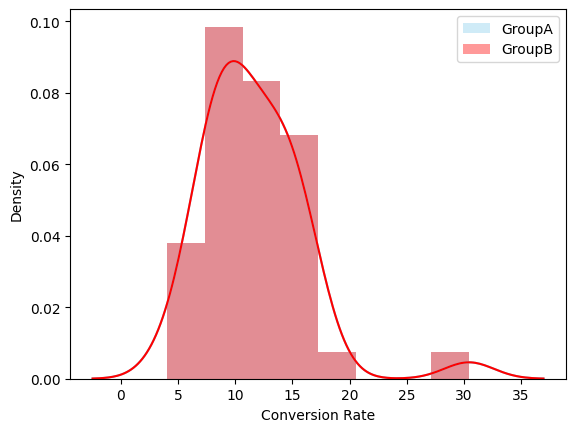

In [35]:
sns.distplot( DataGroupA["Conversion Rate"] , color="skyblue", label="GroupA")
sns.distplot( DataGroupB["Conversion Rate"] , color="red", label="GroupB")
plt.legend()
plt.show()

Summary Statistics by Groups for Conversion Rate: 

Conversion Rate: 

Group      GroupA     GroupB
count   40.000000  40.000000
mean    11.592561  11.592561
std      4.542166   4.542166
median  10.956727  10.956727
min      4.040271   4.040271
max     30.436402  30.436402
Histogram by Groups for Conversion Rate 



/tmp/ipython-input-2103390534.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupA["Conversion Rate"] , color="skyblue", label="GroupA")
/tmp/ipython-input-2103390534.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( DataGroupB["Conversion Rate"] , color="red", label="GroupB")


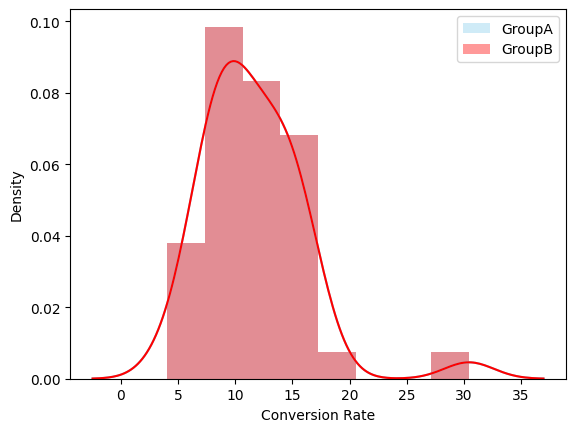

In [36]:
print("Summary Statistics by Groups for Conversion Rate:","\n")

result3 = Data.groupby("Group")["Conversion Rate"].aggregate(["count","mean","std","median","min","max"])
result4 = result3.transpose()
print("Conversion Rate:", "\n")
print(result4)

print("Histogram by Groups for Conversion Rate", "\n")
#sns.displot(Data, x=x, hue="Group", element="step", kde=True)
#plt.show()
sns.distplot( DataGroupA["Conversion Rate"] , color="skyblue", label="GroupA")
sns.distplot( DataGroupB["Conversion Rate"] , color="red", label="GroupB")
plt.legend()
plt.show()

Box Plot by Groups for Conversion Rate: 



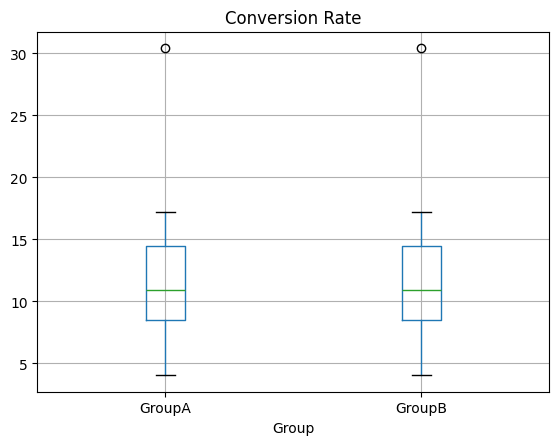

In [37]:
Data.boxplot("Conversion Rate", by="Group",return_type=None)
plt.suptitle("")
print("Box Plot by Groups for Conversion Rate:", "\n")
plt.show()

In [38]:
print("Step 1: Testing the Normality Assumption for Conversion Rate: ", "\n")

GroupA_shaphiro_w, GroupA_shaphiro_p = shapiro(DataGroupA["Conversion Rate"])
GroupB_shaphiro_w, GroupB_shaphiro_p = shapiro(DataGroupB["Conversion Rate"])
print("GroupA_shaphiro_p = %.3f, GroupB_shaphiro_p = %.3f" % (GroupA_shaphiro_p, GroupB_shaphiro_p),"\n")

Step 1: Testing the Normality Assumption for Conversion Rate:  

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 



In [39]:
if GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p > 0.05:
  print("Shaphiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. " , "\n",
        "Accordingly, distribution of conversion rate"+" values in"+" GroupA and GroupB are likely to be normally distributed.","\n")

if GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p < 0.05:
  print("Shaphiro Wilk Test resulted as p < 0.05 for GroupA and GroupB which indicates that H0 is rejected. ", "\n",
                  "Accordingly, distribution of conversion rate"+" values in"+" GroupA and GroupB are not likely to be normally distributed.","\n")

if GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p < 0.05:
  print("Pay Attention!: Shaphiro Wilk Test resulted as p > 0.05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. " , "\n",
                  "Accordingly, we can check if the conversion rate"+" values in"+" GroupB contain outlier or not","\n")

if GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p > 0.05:
  print("Pay Attention!: Shaphiro Wilk Test resulted as p > 0.05 for GroupB while p < .05 for GroupA which indicates that H0 is rejected for GroupA. " , "\n",
                "Accordingly, we can check if the conversion rate"+" values in"+" GroupA contain outlier or not","\n")

Shaphiro Wilk Test resulted as p < 0.05 for GroupA and GroupB which indicates that H0 is rejected.  
 Accordingly, distribution of conversion rate values in GroupA and GroupB are not likely to be normally distributed. 



In [40]:
# print("Step 2: Testing the Homogeneity Assumption for Conversion Rate:","\n")

# levene_F, levene_p = stats.levene(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"])
# print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")

In [41]:
#if levene_p > 0.05:
# print("Levene's Test for Homogeneity resulted as p > 0.05 which indicates that H0 can NOT be rejected.", "\n", " Accordingly variances of GroupA and GroupB are equal.","\n")

# print("3. Step: Alternative 1 -> Independent Samples t Test for Conversion Rate:","\n")
# t_value, t_test_p = stats.ttest_ind(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"], equal_var=True)

# print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")

In [42]:
#if levene_p < 0.05:
# print("Levene's Test for Homogeneity resulted as p < 0.05 which indicates that H0 is rejected.", "\n", "Accordingly variances of GroupA and GroupB are not equal.","\n")

# print("3. Step: Alternative 1 -> Independent Samples t Test for Conversion Rate:","\n")
# t_value, t_test_p = stats.ttest_ind(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"], equal_var=False)
# print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")


In [43]:
# if t_test_p > 0.05:
#                     print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
#                           " Accordingly there is no significant difference between GroupA and GroupB in Conversion Rate"+" values.","\n")
# else:
#                     print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
#                           " Accordingly there is a significant difference between GroupA and GroupB in Conversion Rate"+" values.","\n")

In [44]:
# if statistics.mean(DataGroupA["Conversion Rate"]) > statistics.mean(DataGroupB["Conversion Rate"]):
#   print("Mean of GroupA in Conversion Rate"+" is significantly greater than GroupB","\n")
# else:
#   print("Mean of GroupB in Conversion Rate"+" is significantly greater than GroupA","\n")

**Mann-Whitney U Test**
When variable either doesn't follow normal distribution, or the Homogenity (Equal-variance) test is rejected, we perform the Non-parametric Mann-Whitney U Test

In [45]:
u_value, mannw_test_p = mannwhitneyu(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"])
print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p),"\n")

u_value=800.000, mannw_test_p=1.000 



In [46]:
if mannw_test_p > 0.05:
  print("Mann Whitney U Test resulted as p > 0.05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in distributions of Conversion Rate"+" values.","\n")
else:
  print("Mann Whitney U Test resulted as p < 0.05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in distributions of Conversion Rate"+" values.","\n")

Mann Whitney U Test resulted as p > 0.05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of Conversion Rate values. 



In [47]:
if statistics.median(DataGroupA["Conversion Rate"]) > statistics.median(DataGroupB["Conversion Rate"]):
  print("Median of GroupA in Conversion Rate"+" is significantly greater than GroupB","\n")
else:
  print("Median of GroupB in Conversion Rate"+" is significantly greater than GroupA","\n")

Median of GroupB in Conversion Rate is significantly greater than GroupA 

